<a href="https://colab.research.google.com/github/prcstak/service_text_recognition/blob/main/notebooks/rotate_and_crop_section.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

In [34]:
img = cv2.imread("/content/clean_writting_1.jpg")

hsv_min = np.array((2, 28, 65), np.uint8)
hsv_max = np.array((26, 238, 255), np.uint8)


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

In [35]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

In [36]:
min_section_width = img.shape[1]*0.7
cntsFiltred = [contours[x] for x in range(len(contours)) if hierarchy[0][x][3] == 0 and cv2.boundingRect(contours[x])[2] > min_section_width]
cntsSorted = sorted(cntsFiltred, key=lambda x: cv2.boundingRect(x)[3], reverse=True)

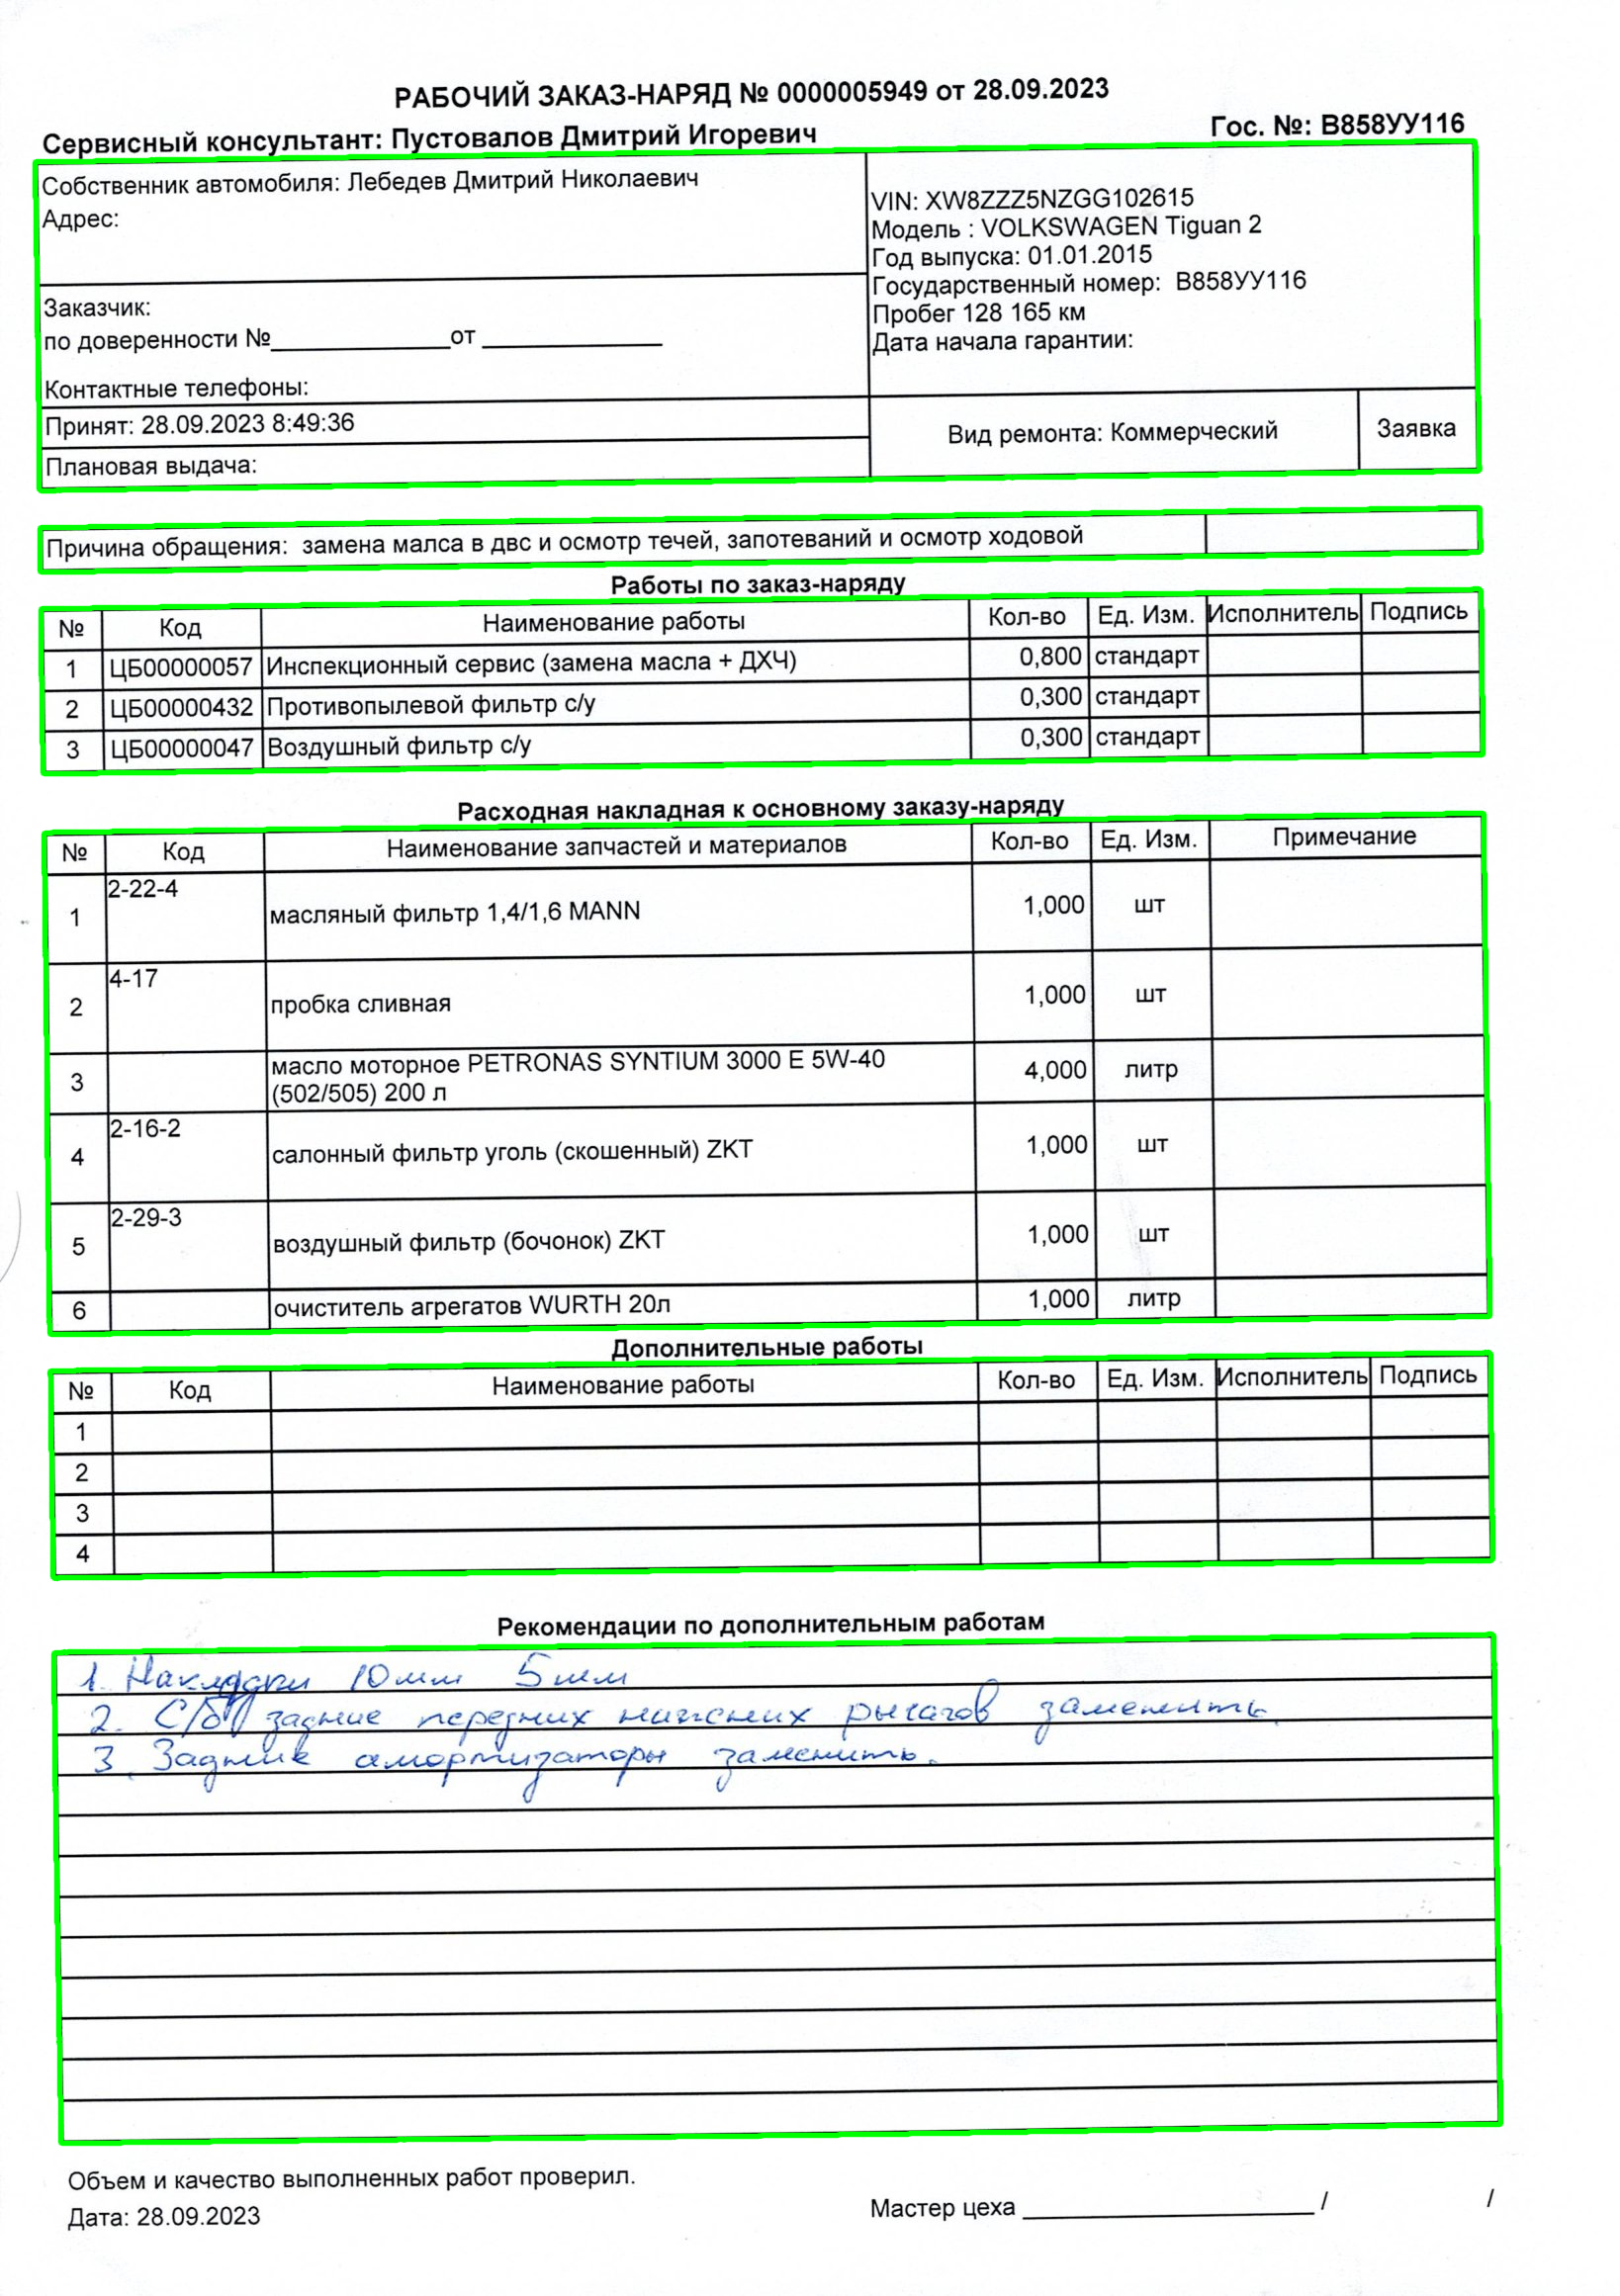

In [37]:
res = cv2.drawContours( img.copy(), cntsSorted[0:7], -1, (0,255,0), 3, cv2.LINE_AA)
cv2_imshow(res) # выводим итоговое изображение в окно

<ipython-input-38-bf45bd9e8047>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
<ipython-input-38-bf45bd9e8047>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)
<ipython-input-38-bf45bd9e8047>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angle_2_x   = float(np.arccos(dot_product))


0.02629550761689612
1.5073857869558285
0.5073857869558285


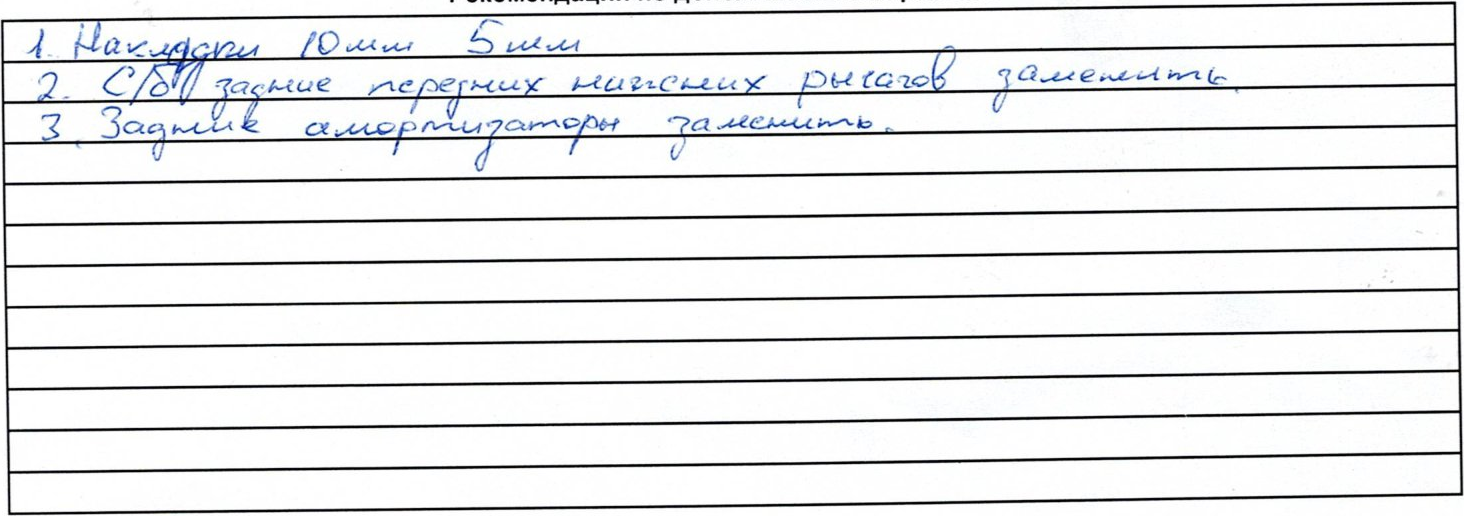

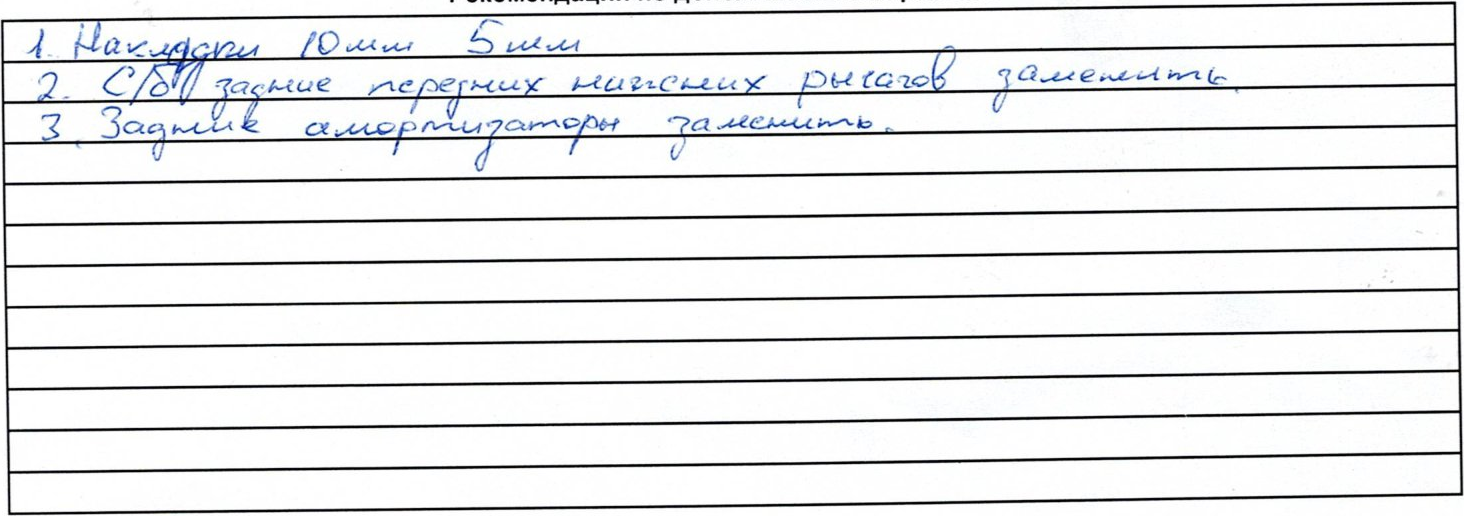

In [38]:
cntsSorted = sorted(cntsSorted[1:7], key=lambda x: cv2.boundingRect(x)[1], reverse=True)

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cntsSorted[0], cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
x_axis      = np.array([1, 0])    # unit vector in the same direction as the x axis
your_line   = np.array([vx, vy])  # unit vector in the same direction as your line
dot_product = np.dot(x_axis, your_line)
angle_2_x   = float(np.arccos(dot_product))
print(angle_2_x)

degree = 180*angle_2_x/3.14
print(degree)
print(degree%1)

rotated = img.copy()

if abs(degree)>1.6:
  (h, w) = img.shape[:2]
  (cX, cY) = (w // 2, h // 2)
  # rotate our image by 45 degrees around the center of the image
  M = cv2.getRotationMatrix2D((cX, cY), -180*angle_2_x/3.1415, 1.0)
  rotated = cv2.warpAffine(img.copy(), M, (w, h))
  # cv2_imshow(rotated)


img_gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
x, y, w, h = cv2.boundingRect(cntsSorted[0])
cropped_image = rotated[y:y + h, x:x + w]
cv2_imshow(img[y:y + h, x:x + w])
cv2_imshow(cropped_image)


